In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

In [3]:
import os 

### Training Image Preprocessing 

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
   'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 70296 files belonging to 38 classes.


### Validation Image Preprocessing 

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
   'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [6]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [7]:
# here x is an training example and y is label  

In [8]:
for x,y in training_set:
    print(x)
    print(y)
    break

tf.Tensor(
[[[[181.5  172.5  175.5 ]
   [178.75 169.75 172.75]
   [187.5  178.5  181.5 ]
   ...
   [179.25 169.25 177.25]
   [175.   165.   173.  ]
   [169.75 159.75 167.75]]

  [[185.75 176.75 179.75]
   [187.   178.   181.  ]
   [187.75 178.75 181.75]
   ...
   [180.5  170.5  178.5 ]
   [176.25 166.25 174.25]
   [172.   162.   170.  ]]

  [[186.75 177.75 180.75]
   [188.   179.   182.  ]
   [186.   177.   180.  ]
   ...
   [182.5  172.5  180.5 ]
   [180.75 170.75 178.75]
   [180.5  170.5  178.5 ]]

  ...

  [[142.75 128.75 128.75]
   [139.   125.   125.  ]
   [128.75 114.75 114.75]
   ...
   [141.75 129.75 133.75]
   [135.5  123.5  127.5 ]
   [132.5  120.5  124.5 ]]

  [[132.25 118.25 118.25]
   [132.5  118.5  118.5 ]
   [130.75 116.75 116.75]
   ...
   [146.75 134.75 138.75]
   [141.75 129.75 133.75]
   [137.75 125.75 129.75]]

  [[133.25 119.25 119.25]
   [129.25 115.25 115.25]
   [129.5  115.5  115.5 ]
   ...
   [134.   122.   126.  ]
   [137.   125.   129.  ]
   [139.75 127.75 13

## To avoid Overshooting 
1.Choose small learing rate deafult is 0.001 we are taking 0.0001.

2.There may be chance of underfitting , so increase number of neuron.

3.Add more convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature.

# Buliding Model

In [36]:
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential 

In [37]:
model=Sequential()

In [38]:
## Building Convolution Layer 

In [39]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [40]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [41]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [42]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [43]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [44]:
model.add(Dropout(0.25)) # To avoid overfitting here we dropout 25%

In [45]:
model.add(Flatten())

In [46]:
model.add(Dense(units=1500,activation='relu'))

In [47]:
model.add(Dropout(0.4)) # To avoid overfitting here we dropout 40%

In [48]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

## Compiling model

## To avoid Overshooting 
1.Choose small learing rate deafult is 0.001 we are taking 0.0001.

2.There may be chance of underfitting , so increase number of neuron.

3.Add more convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature.

In [49]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

## Model Training

In [51]:
 trainig_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 5416s 2s/step - loss: 1.3570 - accuracy: 0.5992 - val_loss: 0.5350 - val_accuracy: 0.8345
Epoch 2/10
2197/2197 [==============================] - 2205s 1s/step - loss: 0.4573 - accuracy: 0.8550 - val_loss: 0.3921 - val_accuracy: 0.8754
Epoch 3/10
2197/2197 [==============================] - 2414s 1s/step - loss: 0.2718 - accuracy: 0.9133 - val_loss: 0.2248 - val_accuracy: 0.9292
Epoch 4/10
2197/2197 [==============================] - 2093s 953ms/step - loss: 0.1852 - accuracy: 0.9393 - val_loss: 0.1998 - val_accuracy: 0.9381
Epoch 5/10
2197/2197 [==============================] - 2028s 923ms/step - loss: 0.1330 - accuracy: 0.9560 - val_loss: 0.1770 - val_accuracy: 0.9446
Epoch 6/10
2197/2197 [==============================] - 1948s 887ms/step - loss: 0.1076 - accuracy: 0.9650 - val_loss: 0.1260 - val_accuracy: 0.9595
Epoch 7/10
2197/2197 [==============================] - 3256s 1s/step - loss: 0.0829 - accuracy: 0.9731 - val_loss:

## Model Evaluation 

In [52]:
Model  Evaluation on Training set 
 train_loss,train_acc=model.evaluate(training_set)

2197/2197 [==============================] - 464s 211ms/step - loss: 0.0209 - accuracy: 0.9940


In [53]:
print(train_loss,train_acc)

0.020878002047538757 0.9939683675765991


In [54]:
Model on Validation set 
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 116s 210ms/step - loss: 0.1037 - accuracy: 0.9685


In [55]:
print(val_loss,val_acc) 

0.10367226600646973 0.9684725403785706


# Saving model 

In [56]:
model.save("trained_model.h5")

In [57]:
 model.save("trained_model.keras")

In [60]:
trainig_history.history 

{'loss': [1.357019305229187,
  0.4572769105434418,
  0.2717503011226654,
  0.18517237901687622,
  0.13299401104450226,
  0.10762493312358856,
  0.08294487744569778,
  0.07573489099740982,
  0.060879118740558624,
  0.0571545846760273],
 'accuracy': [0.599223256111145,
  0.8549562096595764,
  0.9132667779922485,
  0.9393279552459717,
  0.956043004989624,
  0.9649909138679504,
  0.9731279015541077,
  0.9754751324653625,
  0.9804825186729431,
  0.981705904006958],
 'val_loss': [0.5349636077880859,
  0.3921305239200592,
  0.22477170825004578,
  0.19980072975158691,
  0.17701607942581177,
  0.1259762942790985,
  0.14838461577892303,
  0.11766458302736282,
  0.1287599503993988,
  0.10367221385240555],
 'val_accuracy': [0.8345094323158264,
  0.8753699064254761,
  0.9292055368423462,
  0.938083291053772,
  0.9446278214454651,
  0.9594810009002686,
  0.9552128314971924,
  0.966765284538269,
  0.9617573618888855,
  0.9684725403785706]}

In [62]:
 # Recording History in json 
import json 
with open("training_hist.json","w") as f:
    json.dump(trainig_history.history,f)

# Accuracy visualization

In [37]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,trainig_history.history['accuracy'],color='red',label='Training_Accuracy')
plt.plot(epochs,trainig_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

NameError: name 'trainig_history' is not defined

# Some other metrics for model evaluation

In [9]:
class_name= validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [10]:
test_set =  tf.keras.utils.image_dataset_from_directory(
   'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


# Loading the model 

In [11]:
from tensorflow.keras.models import load_model

In [12]:
# Load the saved model
model = load_model("trained_model.keras")

In [13]:
y_pred= model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 114s 206ms/step


(array([[9.9999875e-01, 9.4005735e-08, 9.3258517e-12, ..., 1.6570162e-12,
         1.7190513e-13, 5.9403788e-12],
        [9.9998075e-01, 1.1950945e-06, 1.7723708e-09, ..., 3.8527136e-11,
         2.2534015e-11, 4.5855632e-11],
        [9.9999994e-01, 3.4500192e-16, 3.4437210e-16, ..., 9.4543230e-21,
         4.5140887e-20, 5.2180547e-18],
        ...,
        [9.6748234e-12, 2.5734699e-15, 2.3616448e-10, ..., 3.6741573e-13,
         1.7417826e-14, 9.9999988e-01],
        [1.8665161e-10, 1.6069762e-14, 1.5841128e-10, ..., 2.1090083e-11,
         6.1990918e-13, 1.0000000e+00],
        [1.5288102e-11, 6.8055647e-13, 1.8993791e-11, ..., 7.9282961e-15,
         1.2617256e-12, 9.9999976e-01]], dtype=float32),
 (17572, 38))

In [14]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [15]:
import tensorflow as tf

# Assuming test_set is your test data
# Collect all y values from test_set
y_values = [y for _, y in test_set]

# Concatenate the y values
true_categories = tf.concat(y_values, axis=0)
print(true_categories)


tf.Tensor(
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]], shape=(17572, 38), dtype=float32)


In [18]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

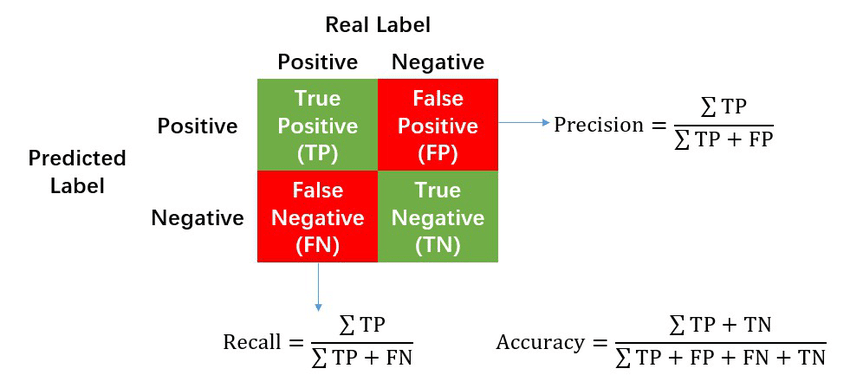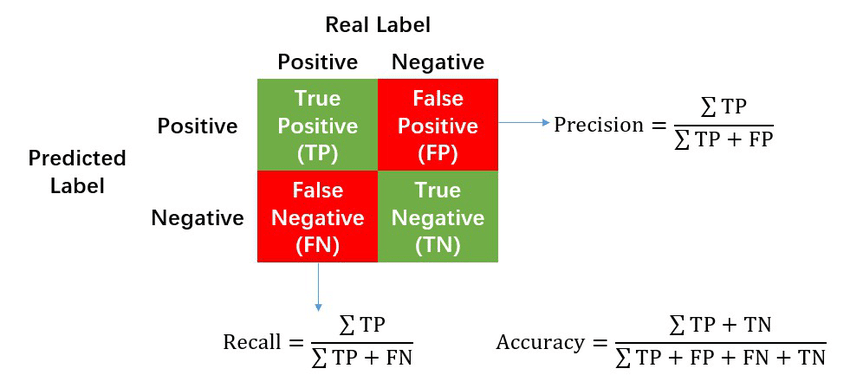


In [ ]:
pip install scikit-learn

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.96      0.96       504
                                 Apple___Black_rot       0.99      0.96      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440
                                   Apple___healthy       0.95      0.96      0.96       502
                               Blueberry___healthy       0.95      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.96      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.93      0.95       410
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.96      0.

In [25]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[484,   2,   1, ...,   0,   0,   0],
       [  8, 478,   0, ...,   0,   0,   0],
       [  0,   0, 431, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 488,   0,   0],
       [  0,   0,   0, ...,   0, 448,   0],
       [  0,   0,   0, ...,   0,   0, 476]], dtype=int64)

## Confusion Matrix Visualization

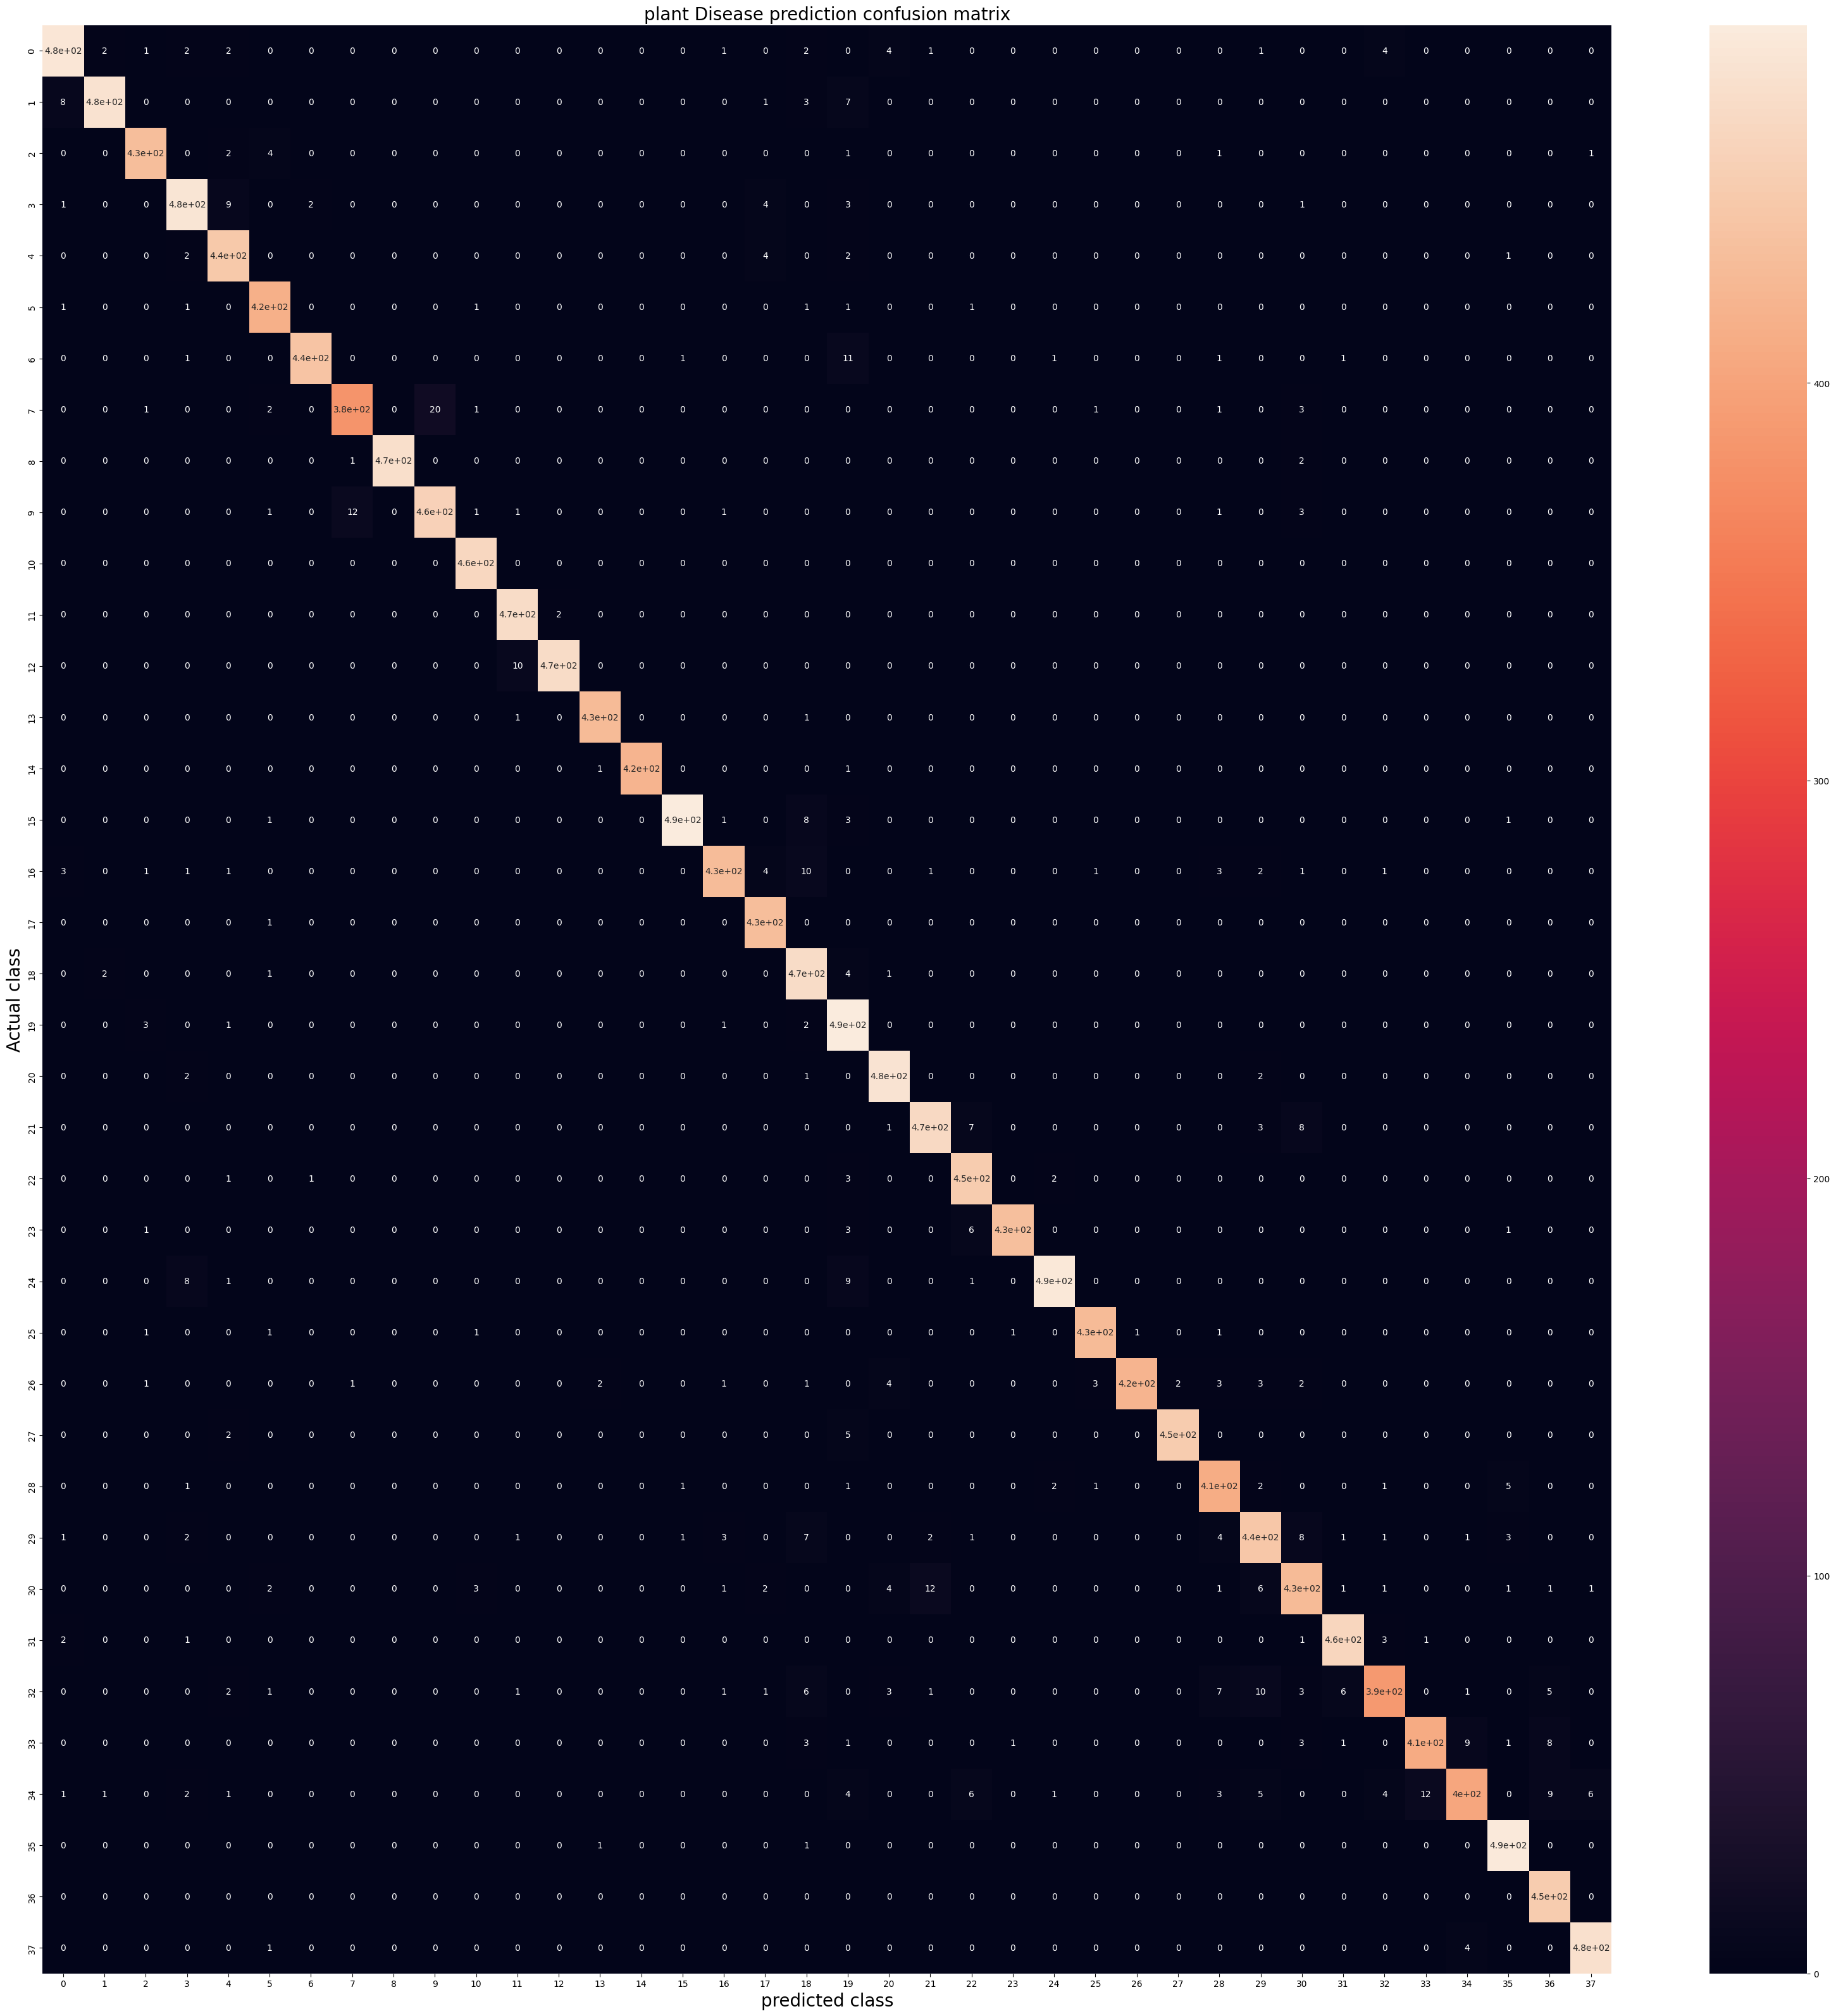

In [36]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("predicted class",fontsize=20)
plt.ylabel("Actual class",fontsize=20)
plt.title("plant Disease prediction confusion matrix",fontsize=20)
plt.show()